In [1]:
import pandas as pd
import numpy as np
import re
import string

from collections import Counter
from nltk.corpus import stopwords

from keras_preprocessing import text

from itertools import groupby

from tqdm.autonotebook import tqdm

pd.set_option('display.max_colwidth', -1)

/Users/etienne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  del sys.path[0]


Load datasets

In [2]:
pos_df = pd.read_csv("Datasets/twitter-datasets/train_pos.txt", delimiter="\\n", header=None, 
                     names = ["tweets"], engine='python')
neg_df = pd.read_csv("Datasets/twitter-datasets/train_neg.txt", delimiter="\\n", header=None,
                     names = ["tweets"], engine='python')

In [3]:
test_df = pd.read_csv("Datasets/twitter-datasets/test_data.txt", delimiter="\\n", header=None,
                     names = ["tweets"], engine='python')
test_df = pd.DataFrame(test_df.tweets.str.split(',',1).tolist(), columns = ['id','tweets'])

In [4]:
def count_null(tweets):
    acc = 0
    for index,tweet in enumerate(tweets):
        if len(tweet) == 0:
            #print(index)
            acc+=1
    return acc



Add labels

In [5]:
pos_df['label'] = 1
neg_df['label'] = 0

Remove numbers

In [6]:
pos_df.tweets = pos_df.tweets.str.replace('\d+', '')
neg_df.tweets = neg_df.tweets.str.replace('\d+', '')
test_df.tweets = test_df.tweets.str.replace('\d+', '')

In [7]:
print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

0 0 0


Remove `<user>`

In [8]:
pos_df.tweets = pos_df.tweets.str.replace("<user>", "")
neg_df.tweets = neg_df.tweets.str.replace("<user>", "")
test_df.tweets = test_df.tweets.str.replace("<user>", "")

In [9]:
print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

0 0 0


Remove `<url>`

In [10]:
pos_df.tweets = pos_df.tweets.str.replace("<url>", "")
neg_df.tweets = neg_df.tweets.str.replace("<url>", "")
test_df.tweets = test_df.tweets.str.replace("<url>", "")

In [11]:
print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

0 0 0


In [510]:
tokenizer = text.Tokenizer(filters='!"$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(np.hstack((pos_df.tweets.values,neg_df.tweets.values,test_df.tweets)))

In [511]:
def count_in_token(token,count):
    for label, group in groupby(token):
        if sum(1 for _ in group) > count:
            return True
    return False

In [512]:
counts = {k: tokenizer.word_counts[k] for k in tokenizer.word_index.keys()}

In [49]:
detailing = {
            ('soo','so'),
            ('sooo','so'),
             ('aint','are not'),
             ('mother','mom'),
             ('fb','facebook'),
             ('daddy', 'dad'),
             ('gotta', 'have to'),
             ('lil','little'),
             ('btw','by the way'),
             ('goodmorning', 'good morning'),
             ('youu','you'),
             ('alll','all'),
             ('ohh','oh'),
             ('ahh','ah'),
             ('pls','please'),
             ('ppl','people'),
             ('yup','yes'),
             ('af','much'),
             ('dnt','dont'),
             ('2nd','second'),
             ('idk','i dont know'),
             ('cuz','because'),             
             ('yea','yes'),
             ('dm','message'),
             ('rt','retweet'),
             ('ima','I am going to'),
             ('till','until'),
             ('cause','because'),
            ('ahh','ah'),
            ('meee','me'),
            ('ohhh','oh'),
            ('alll','all'),
            ('youuu','you'),
            ('pleaseee','please'),
            ('yesss','yes'),
            ('goood','good'),
            ('oooh','oh'),
             ('heyyy','hey'),
             ('whyyy','why'),
             ('knowww','know'),
             ('misss','miss'),
             ('thanksss','thanks'),
             ('omg','oh my god'),
             ('welll','well'),
             ('reallly','really'),
             ('mannn','man'),
             ('sleeep','sleep'),
             ('heeey','hey'),
             ('sooon','soon'),
             ('pleeease','please'),
             ('nowww','now'),
             ('ittt','it'),
             ('looong','long'),
             ('wayyy','way'),
             ('babyyy','baby'),
             ('owww','cute'),
             ('neeed','need'),
             ('whaaat','what'),
             ('awwwh','cute'),
             ('fuckkk','fuck'),
             ('girlll','girl'),
             ('cuteee','cute'),
             ('everrr','ever'),
             ('shittt','shit'),
             ('happpy','happy'),
             ('aww','cute'),
             ('yall','you all'),
             ('ahh','ah'),
             ('ohh','oh'),
             ('imma','i am going to'),
             ('ppl','people'),
             ('youu','you'),
             ('ii','ok'),
             ('mee','me'),
             ('bb','baby'),
             ('nooo','no'),
             ('noo','no'),
             ('yess','yes'),
            ('dunno','dont know'),
             ('yeahh','yeah'),
             ('ooh','oh'),
             ('wee','we'),
             ('bbm','big black meat'),
             ('theyll','they will'),
             ('momma','mum'),
             ('yummy','good'),
             ('lemme','let me'),
             ('heyy','hey'),
             ('im','i am'),
             ('lil','little'),
             ('bae','baby'),
             ('babe','baby'),
             ('fml','fuck my life'),
             ('asap', 'as soon as possible'),
             ('smh','shake my head'),
             ('cmon','come on'),
            ('u','you'),
            ('ur','your'),
           ('ive','I have'),
           ('ya','you'),
            ('tho','though'),
    
    # fun set
    ('funny','fun'),
    ('laughing','fun'),
    ('laugh','fun'),
    ('hahahaha','fun'),
    ('hahahah','fun'),
    ('hahaha','fun'),
    ('hahah','fun'),
    ('hahaa','fun'),
    ('ahahaha','fun'),
    ('ahahah','fun'),
    ('ahaha','fun'),
    ('ahah', 'fun'),
    ('haha','fun'),
    ('aha','fun'),
    ('yay','fun'),
    ('xd','fun'),
    ('lmao','fun'),
    ('lmaoo','fun'),
    ('lmaooo','fun'),
    ('yeahhh','yeah'),
    ('lmfaooo','fun'),
    ('lmfaoo','fun'),
    ('lmfao','fun'),
    ('loool','fun'),
    ('lol','fun'),
    ('lool','fun'),
    ('jk', 'fun'),
    (':\')', 'fun'),
    (':p', 'fun'),
    (';p', 'fun'),
    ('hehe', 'fun'),
    ('hehehe', 'fun'),

    
    
    #good
    ('follow', 'good'),
    ('#teamfollowback','good'),
    ('please','good'),
    ('beautiful','good'),
    ('great', 'good'),
    ('glad', 'good'),
    ('enjoyed', 'good'),
    ('nice','good'),
    ('better','good'),
    ('sweet','good'),
    ('amazing', 'good'),
    ('cute','good'),
    ('awesome','good'),
    ('beautiful','good'),
    ('friend', 'good'),
    ('pretty','good'),
    ('yes','good'),
    
    #happy
    ('smile', 'happy'),
    ('excited','happy'),
    ('cool','happy'),
    ('coool', 'happy'),
    ('cooool', 'happy'),
    (':)', 'happy'),
    (':))', 'happy'),
    ('(:','happy'),
    (':d','happy'),
    (';)','happy'),
    (';d', 'happy'),
    ('420','happy'),
    ('4:20','happy'),
    ('4h20','happy'),
    ('thankyou', 'happy'),
    ('thank', 'happy'),
    ('thanks','happy'),
    ('bday','happy'),
    ('birthday','happy'),
    ('thx','happy'),
    ('thxs','happy'),
    ('joy','happy'),
    ('lit','happy'),
    ('pleasure','happy'),
    ('yolo','happy'),

    #love
    
    ('loove', 'love'),
    ('looove','love'),
    ('lovee','love'),
    ('loveee','love'),
    ('luv','love'),
    ('<3', 'love'),
    ('xx', 'love'),
    ('xxx', 'love'),
    ('xo','love'),
    ('xoxo','love'),
    ('loving','love'),
    ('aw', 'love'),
    ('aww','love'),
    ('awh','love'),
    ('awww','love'),
    (':*','love'),
    ('loved', 'love'),
    ('looved', 'love'),
    ('friend','love'),
    ('friendship','love'),
    ('bf','love'),
    ('bff','love'),
    ('#love','love'),
    ('bb','love'),
    ('baby','love'),
    ('bby','love'),
    ('bae','love'),

    
    #sad
    
    ('noo', 'sad'),
    ('nooo','sad'),
    (':(','sad'),
    (':\'(', 'sad'),
    (':((', 'sad'),
    ('depressed', 'sad'),
    ('depression','sad'),
    ('cry','sad'),
    ('crying','sad'),
    ('sucks', 'sad'),
    ('alone','sad'),
    ('lonely','sad'),
    ('broke','sad'),
    ('death','sad'),
    ('dead', 'sad'),
    ('rip', 'sad'),
    ('suicide', 'sad'),
    ('suicidal', 'sad'),
    ('#sad', 'sad'),
    ('rip', 'sad'),
    ('fml', 'sad'),
    ('ugh', 'sad'),
    ('ughh', 'sad'),
    ('af', 'sad'),
    ('miss', 'sad'),
    ('missing', 'sad'),
    ('terrible', 'sad'),
    ('wish', 'sad'),
    ('sorry', 'sad'),
    ('fml', 'sad'),

    
   #angry
    
    ('angry', 'hate'),
    ('anger','hate'),
    ('fuck','hate'),
    ('haters', 'hate'),
    ('bitch', 'hate'),
    ('biatch', 'hate'),
    ('fck','hate'),
    ('f***','hate'),
    ('f**k','hate'),
    ('fock', 'hate'),
    ('mf','hate'),
    ('motherfucker','hate'),
    ('mofo','hate'),
    ('pissed','hate'),
    ('stupid', 'hate'),
    ('kill', 'hate'),
    ('killer', 'hate'),
    ('ugly', 'hate'),
    ('disgusting', 'hate'),
    ('#hate', 'hate'),

    
    #bad
    
    ('study', 'bad'),
    ('white','bad'),
    ('black','bad'),
    ('picture', 'bad'),
    ('business', 'bad'),
    ('dvd', 'bad'),
    ('cd','bad'),
    ('audio','bad'),
    ('wrong','bad'),
    ('book', 'bad')
   
 
   
             
             
             
             
            }

In [50]:
dic = dict(detailing)

In [51]:
#pos_df.tweet_as_list = pos_df.tweet_as_list.apply(lambda tweet_list: [dic(word) if word in dic.keys else word for word i])

pos_df.tweets = pos_df.tweets.apply(lambda tweet: " ".join([dic[word] if word in dic.keys() else word for word in tweet.split(" ")]))
                                    
neg_df.tweets = neg_df.tweets.apply(lambda tweet: " ".join([dic[word] if word in dic.keys() else word for word in tweet.split(" ")]))
                                    
test_df.tweets = test_df.tweets.apply(lambda tweet: " ".join([dic[word] if word in dic.keys() else word for word in tweet.split(" ")]))
                                    
                                    

Remove stopwords

In [443]:
#stopWords = stopwords.words('english')

In [444]:
#pos_df.tweets = pos_df.tweets.apply(lambda t : " ".join([word for word in t.split() if word not in stopWords]))
#neg_df.tweets = neg_df.tweets.apply(lambda t : " ".join([word for word in t.split() if word not in stopWords]))
#test_df.tweets = test_df.tweets.apply(lambda t : " ".join([word for word in t.split() if word not in stopWords]))

In [445]:
#print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

Remove punctuation

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
pos_df.tweets = pos_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))
neg_df.tweets = neg_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))
test_df.tweets = test_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))

In [14]:
print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

0 0 0


Remove consecutive white spaces

In [15]:
pos_df.tweets = pos_df.tweets.apply(lambda t : " ".join(t.split()))
neg_df.tweets = neg_df.tweets.apply(lambda t : " ".join(t.split()))
test_df.tweets = test_df.tweets.apply(lambda t : " ".join(t.split()))

In [16]:
print(count_null(pos_df.tweets),count_null(neg_df.tweets),count_null(test_df.tweets))

21 3 0


Remove stop words from our detailing 

In [456]:
"""for k, v in detailing:
    if v in stopWords:
        detailing.remove((k,v))
        detailing.add((k,''))"""

"for k, v in detailing:\n    if v in stopWords:\n        detailing.remove((k,v))\n        detailing.add((k,''))"

Replace our detailing in tweets

In [297]:
"""for k, v in tqdm(detailing):
    pos_df.tweets = pos_df.tweets.str.replace(k, v)
    neg_df.tweets = neg_df.tweets.str.replace(k, v)
    test_df.tweets = test_df.tweets.str.replace(k, v)"""

Remove consecutive white spaces again

In [522]:
pos_df.tweets = pos_df.tweets.apply(lambda t : " ".join(t.split()))
neg_df.tweets = neg_df.tweets.apply(lambda t : " ".join(t.split()))
test_df.tweets = test_df.tweets.apply(lambda t : " ".join(t.split()))

Counts

In [550]:
pos_df.tweets = pos_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))
neg_df.tweets = neg_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))
test_df.tweets = test_df.tweets.str.translate(str.maketrans('', '', string.punctuation.replace('#','')))

In [557]:
results_pos = Counter()
pos_df.tweets.str.lower().str.split().apply(results_pos.update)
results_neg = Counter()
neg_df.tweets.str.lower().str.split().apply(results_neg.update)

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
1249970    None
1249971    None
1249972    None
1249973    None
1249974    None
1249975    None
1249976    None
1249977    None
1249978    None
1249979    None
1249980    None
1249981    None
1249982    None
1249983    None
1249984    None
1249985    None
1249986    None
1249987    None
1249988    None
1249989    None
1249990    None
1249991    None
1249992    None
1249993    None
1249994    None
1249995    None
1249996    None
1249997    None
1249998    None
1249999    None
Name: tweets, Length: 12

In [558]:
count_pos = results_pos.most_common(1000)
count_neg = results_neg.most_common(1000)

dict_count_pos = dict(count_pos)
dict_count_neg = dict(count_neg)

both = dict_count_pos.keys() & (dict_count_neg.keys())

count_total = [(word, dict_count_pos[word]+dict_count_neg[word]) for word in both]
dict_both = dict(count_total)

In [559]:
bar_pos = [(word, dict_count_pos[word]) for word in both if 100*dict_count_pos[word]/dict_both[word]>75]
bar_neg = [(word, dict_count_neg[word]) for word in both if 100*dict_count_neg[word]/dict_both[word]>75]

In [561]:
bar_neg

[('t', 12172),
 ('cold', 6532),
 ('blue', 8115),
 ('hurt', 5414),
 ('g', 8864),
 ('sad', 24209),
 ('red', 8472),
 ('book', 14952),
 ('cry', 9763),
 ('miss', 41159),
 ('via', 11132),
 ('picture', 28901),
 ('black', 32352),
 ('case', 12919),
 ('sick', 8854),
 ('f', 6208),
 ('white', 14243),
 ('hate', 21812),
 ('set', 15780),
 ('m', 14961),
 ('small', 4817),
 ('anymore', 8304),
 ('news', 7208),
 ('wish', 29534),
 ('light', 4897),
 ('lost', 7280),
 ('c', 10563)]

In [529]:
sorted_pos_70 = sorted(bar_pos, key=lambda tup: -tup[1])
sorted_neg_70 = sorted(bar_neg, key=lambda tup: -tup[1])

In [530]:
word = ['love','excited', 'black','sorry','hate','amazing','following','white']
pos = [dict_count_pos[w] for w in word]
neg = [dict_count_neg[w] for w in word]

KeyError: 'excited'

In [470]:
dict_count_neg['fun']

78211

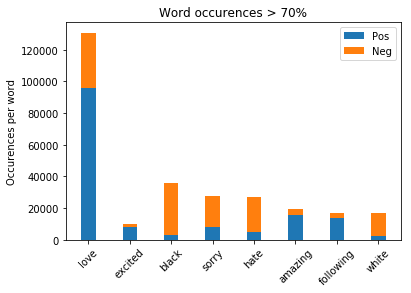

In [535]:
import numpy as np
import matplotlib.pyplot as plt


N = len(word)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pos, width)
p2 = plt.bar(ind, neg, width,
             bottom=pos)

plt.ylabel('Occurences per word')
plt.title('Word occurences > 70%')
plt.xticks(ind, word, rotation=45)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Pos', 'Neg'))


Remove duplicate tweets

In [531]:
pos_df = pos_df.drop_duplicates(subset=["tweets"])
neg_df = neg_df.drop_duplicates(subset=["tweets"])

pos_df = pos_df.dropna()
neg_df = neg_df.dropna()

train = pd.concat([pos_df,neg_df])

In [532]:
acc = 0
for tweet in train.tweets:
    if type(tweet) == float:
        acc += 1
        print(tweet)
print(acc)

0


Write back to disk

In [533]:
np.savetxt("Datasets/twitter-datasets/train_pos_full_cleaned.txt", pos_df.values, fmt='%s')
np.savetxt("Datasets/twitter-datasets/train_neg_full_cleaned.txt", neg_df.values, fmt='%s')

In [19]:
pos_df.to_csv("Datasets/twitter-datasets/train_pos_cleaned.csv")
neg_df.to_csv("Datasets/twitter-datasets/train_neg_cleaned.csv")
test_df.to_csv("Datasets/twitter-datasets/test_data_cleaned.csv")